In [1]:
import mediapipe as mp 
import cv2

In [2]:
#utils to landmarks
mp_hands=mp.solutions.hands #Cette ligne importe le module hands de MediaPipe, qui est utilisé pour la détection et le suivi des mains.
mp_drawing=mp.solutions.drawing_utils #Cette ligne importe les utilitaires de dessin de MediaPipe, qui permettent de dessiner les annotations sur les images
mp_drawing_styles=mp.solutions.drawing_styles #Cette ligne importe les styles de dessin de MediaPipe, qui définissent les styles visuels pour les annotations.

hands=mp_hands.Hands(static_image_mode=True,min_detection_confidence=0.3)

In [3]:
data_dir = "./data"
data=[]
labels=[]

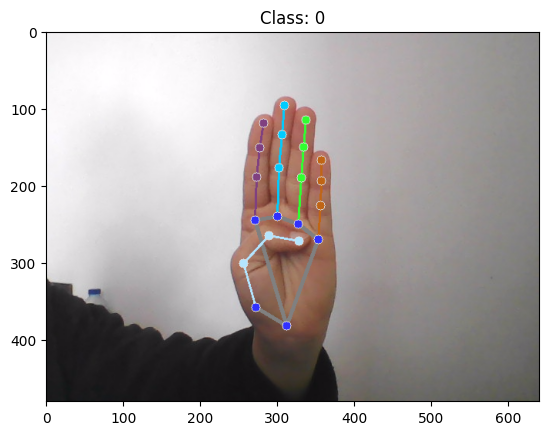

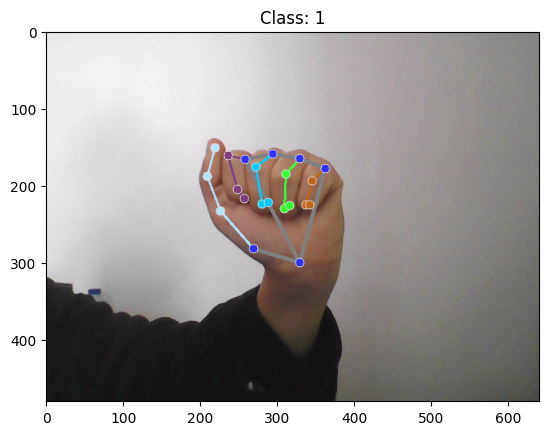

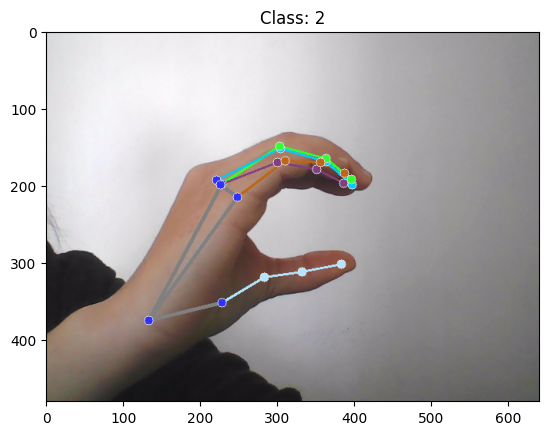

In [4]:
import os
import matplotlib.pyplot as plt


#exmples of our data with landmark :

def display_examples(data_dir, num_examples):
    for repo in os.listdir(data_dir):
        repo_path = os.path.join(data_dir, repo)
        if os.path.isdir(repo_path):
            images = os.listdir(repo_path)[:num_examples]
            for image_path in images:
                img_path = os.path.join(repo_path, image_path)
                img = cv2.imread(img_path)
                if img is not None:
                    # Convertir l'image de BGR à RGB
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    results = hands.process(img_rgb)
                    if results.multi_hand_landmarks:
                        for hand_landmarks in results.multi_hand_landmarks:
                            mp_drawing.draw_landmarks(
                                img_rgb,
                                hand_landmarks,
                                mp_hands.HAND_CONNECTIONS,
                                mp_drawing_styles.get_default_hand_landmarks_style(),
                                mp_drawing_styles.get_default_hand_connections_style()
                            )
                    plt.figure()
                    plt.imshow(img_rgb)
                    plt.title(f'Class: {repo}')
                else:
                    print(f'Failed to load image: {img_path}')
    plt.show()


display_examples(data_dir,1)


In [5]:
import os

for repo in os.listdir(data_dir):
    repo_path = os.path.join(data_dir, repo)
    if os.path.isdir(repo_path):
        for image_path in os.listdir(repo_path):
            data_aux = []
            img_path = os.path.join(repo_path, image_path)
            img = cv2.imread(img_path)
            if img is not None:
                # Convertir l'image de BGR à RGB
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                results = hands.process(img_rgb)
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        for i in range(len(hand_landmarks.landmark)):
                            x = hand_landmarks.landmark[i].x
                            y = hand_landmarks.landmark[i].y
                            data_aux.append(x)
                            data_aux.append(y)
                    data.append(data_aux)
                    labels.append(repo)
            else:
                print(f'Failed to load image: {img_path}')


In [6]:
import pickle

# Sauvegarder les données dans un fichier pickle
with open('data.pickle', 'wb') as f:
    pickle.dump({'data': data, 'labels': labels},f)

print("Data has been saved to data.pickle")


Data has been saved to data.pickle
